In [1]:
import os    
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical

In [2]:
# Load the MNIST Fashion dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
# Preprocess the training and testing data
x_train = x_train[:5000].reshape((5000, 28, 28, 1)).astype('float32') / 255
x_test = x_test[:2000].reshape((2000, 28, 28, 1)).astype('float32') / 255
y_train = to_categorical(y_train[:5000], num_classes=10)
y_test = to_categorical(y_test[:2000], num_classes=10)

# Obtain validation data
x_val = x_train[4000:]
y_val = y_train[4000:]

In [4]:
#Build and run basic model
# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    Flatten(),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 1152)              0

In [5]:
# Compile the model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val))

Epoch 1/10
79/79 [==============================] - 2s 14ms/step - loss: 1.1034 - accuracy: 0.5930 - val_loss: 2.4286 - val_accuracy: 0.3850
Epoch 2/10
79/79 [==============================] - 1s 13ms/step - loss: 0.6910 - accuracy: 0.7524 - val_loss: 0.7805 - val_accuracy: 0.6790
Epoch 3/10
79/79 [==============================] - 1s 12ms/step - loss: 0.5704 - accuracy: 0.7910 - val_loss: 0.6015 - val_accuracy: 0.7950
Epoch 4/10
79/79 [==============================] - 1s 13ms/step - loss: 0.5065 - accuracy: 0.8148 - val_loss: 0.4862 - val_accuracy: 0.8130
Epoch 5/10
79/79 [==============================] - 1s 14ms/step - loss: 0.4657 - accuracy: 0.8304 - val_loss: 0.8317 - val_accuracy: 0.6800
Epoch 6/10
79/79 [==============================] - 1s 14ms/step - loss: 0.4253 - accuracy: 0.8504 - val_loss: 0.3500 - val_accuracy: 0.8630
Epoch 7/10
79/79 [==============================] - 1s 11ms/step - loss: 0.3930 - accuracy: 0.8592 - val_loss: 0.3298 - val_accuracy: 0.8850
Epoch 8/10
79

[0.5929999947547913, 0.7523999810218811, 0.7910000085830688, 0.8148000240325928, 0.8303999900817871, 0.8503999710083008, 0.8592000007629395, 0.8715999722480774, 0.8804000020027161, 0.8827999830245972]


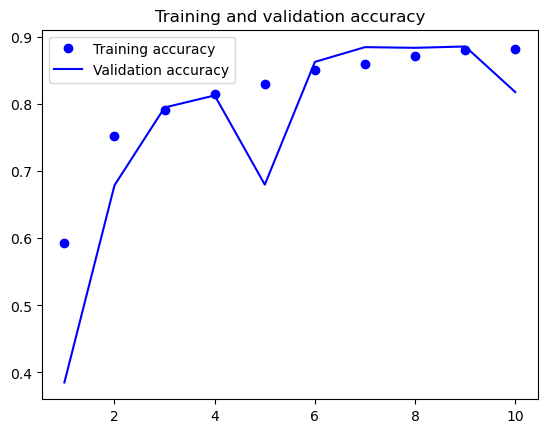

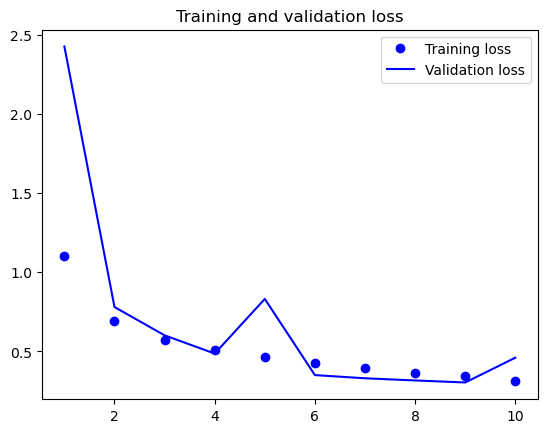

In [7]:
#Plotting- train vs. validation accuracy, train vs. validation loss
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
print (accuracy)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [8]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

63/63 [==============================] - 0s 3ms/step - loss: 0.7122 - accuracy: 0.7525
Test accuracy: 0.7524999976158142


In [15]:
#Data augmented model, tuning of hyperparameters.
from keras.layers import RandomFlip, RandomRotation, RandomZoom, Rescaling, Dropout
data_augmentation = Sequential(
    [
        RandomFlip("horizontal"),
        RandomRotation(0.1),
        RandomZoom(0.1),
    ]
)

In [10]:
# Define the model- as done in the homework
model2 = Sequential([
    # Apply data augmentation
    data_augmentation,
    # Add layers- including new Dense ones!
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model2.build((None, 28, 28, 1))
model2.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 28, 28, 1)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 128)        

In [11]:
# Compile the model
model2.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
# Train the model
history = model2.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/20
157/157 [==============================] - 7s 21ms/step - loss: 1.8293 - accuracy: 0.3376 - val_loss: 0.8898 - val_accuracy: 0.6790
Epoch 2/20
157/157 [==============================] - 3s 21ms/step - loss: 1.2631 - accuracy: 0.5440 - val_loss: 0.7557 - val_accuracy: 0.7480
Epoch 3/20
157/157 [==============================] - 4s 22ms/step - loss: 1.0773 - accuracy: 0.5986 - val_loss: 0.6071 - val_accuracy: 0.7640
Epoch 4/20
157/157 [==============================] - 3s 21ms/step - loss: 0.9564 - accuracy: 0.6452 - val_loss: 0.6144 - val_accuracy: 0.7820
Epoch 5/20
157/157 [==============================] - 3s 20ms/step - loss: 0.8795 - accuracy: 0.6682 - val_loss: 0.5342 - val_accuracy: 0.8020
Epoch 6/20
157/157 [==============================] - 3s 21ms/step - loss: 0.8158 - accuracy: 0.7010 - val_loss: 0.5135 - val_accuracy: 0.8050
Epoch 7/20
157/157 [==============================] - 3s 21ms/step - loss: 0.7905 - accuracy: 0.7138 - val_loss: 0.6678 - val_accuracy: 0.7550

[0.3375999927520752, 0.5440000295639038, 0.5985999703407288, 0.6452000141143799, 0.6682000160217285, 0.7009999752044678, 0.7138000130653381, 0.7178000211715698, 0.7269999980926514, 0.7441999912261963, 0.746399998664856, 0.7537999749183655, 0.7671999931335449, 0.7626000046730042, 0.7746000289916992, 0.7764000296592712, 0.7838000059127808, 0.7825999855995178, 0.7868000268936157, 0.7829999923706055]


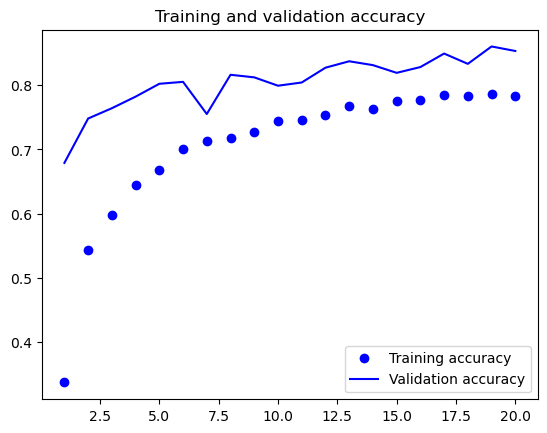

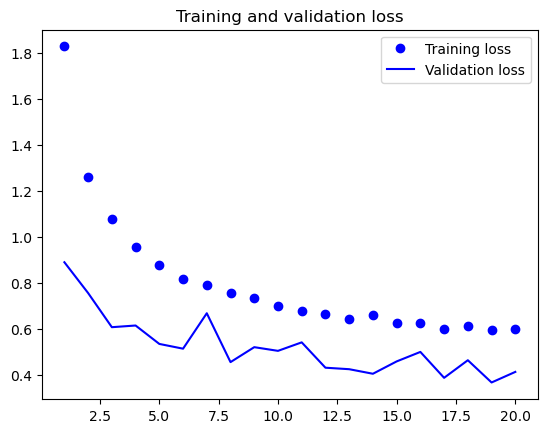

In [13]:
#plot and outcome
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
print (accuracy)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [16]:
#Final result
test_loss, test_acc = model2.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

63/63 [==============================] - 12s 192ms/step - loss: 0.6338 - accuracy: 0.8080
Test accuracy: 0.8080000281333923
